<div class="alert alert-block alert-success">
<h1>Statistical Methods and Correlation Analysis</h1></div>

**Student:** Kirsten Schulze <br>
**Email:** <kirsten.schulze@studium.uni-hamburg.de> <br>

**MSc Thesis in Ocean and Climate Physics** <br>
**Title:** Evaluation of Snow Depth Retrievals from Differences in ICESat-2 and CryoSat-2 Freeboards Using In-Situ Measurements in the Weddell Sea  <br>
**Supervisors:** Prof. Dr. Stefanie Arndt and Dr. Stefan Kern <br>
**Hamburg University** <br>


<div class="alert alert-info" role="alert">

## <a id="TOC_TOP"></a>Contents

</div>

1. [Load Data from the 27 Snow Buoys](#section1)
1. [Load the Satellite Product for 2019, 2021, 2022](#section2)
1. [Load Matches for 2019, 2021, 2022](#section3)
1. [Statistical Methods and Correlation Analysis](#section4)
	1. [Descriptive Statistics](#section4.1)
    1. [KaKo20 vs. Snow Buoy Snow Depth](#section4.2)
    1. [Histograms](#section4.3)
    1. [Q-Q Plots and Shapiro-Wilk Test](#section4.4)
    1. [Pearson and Spearman Correlation Test](#section4.5)


<hr>

In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import seaborn as sns

import scipy.stats as stats
from scipy.stats import shapiro #import for Shapiro-Wilk test
from scipy.stats import spearmanr

In [2]:
plt.style.use("ggplot")

<div class="alert alert-info" role="alert">

## <a id="section1"></a>Load Data from the 27 Snow Buoys
[Back to top](#TOC_TOP)

</div>

Load all Snow Buoy data and filter it to include only the months from April to November for the years 2019, 2021, and 2022.

In [3]:
file = "ds_buoys_27.csv"
ds = pd.read_csv(file, sep=None, engine="python") 

#Convert timestamp to datetime64[ns]
ds["timestamp"] = pd.to_datetime(ds["timestamp"], errors="coerce")
print(ds.dtypes)

# List of months
months = [4, 5, 6, 7, 8, 9, 10, 11]

# Filter for the specified months
filtered_ds_months = ds[ds["Month"].isin(months)]

# List of years
years = [2019, 2021, 2022]

ds_all_buoy = filtered_ds_months[filtered_ds_months["Year"].isin(years)]
ds_all_buoy.reset_index(drop=True, inplace=True)

Year                               int64
Month                              int64
Day                                int64
Datenum                            int64
Latitude                         float64
Longitude                        float64
Mean snow accu                    object
Mean snow ice                    float64
Mean snow depth                  float64
Mean sea ice thickness            object
Sensor Number                     object
timestamp                 datetime64[ns]
dtype: object


<div class="alert alert-info" role="alert">

## <a id="section2"></a>Load the Satellite Product for 2019, 2021, 2022
[Back to top](#TOC_TOP)

</div>

Loading all daily snow depth values from the KaKo20 prodcut in the Weddell Sea:

In [4]:
file = "df_KaKo20_2019.txt"
ds_KaKo20_2019 = pd.read_csv(file, sep="\t", engine="python") 

file = "df_KaKo20_2021.txt"
ds_KaKo20_2021 = pd.read_csv(file, sep="\t", engine="python") 

file = "df_KaKo20_2022.txt"
ds_KaKo20_2022 = pd.read_csv(file, sep="\t", engine="python") 

ds_all_KaKo20 = pd.concat([ds_KaKo20_2019, ds_KaKo20_2021, ds_KaKo20_2022])

<div class="alert alert-info" role="alert">

## <a id="section3"></a>Load Matches for 2019, 2021, 2022
[Back to top](#TOC_TOP)

</div>

In [5]:
file = "matches_2019.txt"
ds = pd.read_csv(file, sep=None, engine="python") 
ds["Timestamp"] = pd.to_datetime(ds["Timestamp"], errors="coerce")
matches_2019 = ds
matches_2019

,Year,Month,Day,X,Y,Snow_depth_satellite,Snow_depth_buoy,Mean_snow_accu,X_buoy,Y_buoy,Sensor_Number,lat_buoy,lon_buoy,lat_Kako20,lon_Kako20,Timestamp
0,2019,5,6,-850.0,1550.0,11.35041,69.652,106.428,-852.700889,1548.047796,S56,-73.7900,-28.8470,-73.78629,-28.73980,2019-05-06
1,2019,5,22,-900.0,1425.0,23.25146,69.014,105.882,-911.347875,1433.840884,S56,-74.4098,-32.4400,-74.53261,-32.27565,2019-05-22
2,2019,6,23,-1100.0,1425.0,29.40812,68.443,105.311,-1101.271050,1432.386386,S56,-73.4330,-37.5544,-73.49296,-37.66562,2019-06-23
3,2019,9,9,-1400.0,1650.0,24.64406,69.910,107.286,-1395.346692,1660.871508,S56,-70.1682,-40.0346,-70.21578,-40.31410,2019-09-09
4,2019,10,5,-1450.0,1775.0,29.25603,72.372,109.749,-1450.425563,1771.493331,S56,-69.0910,-39.3092,-69.06914,-39.24543,2019-10-05


In [6]:
file = "matches_2021.txt"
ds = pd.read_csv(file, sep=None, engine="python") 
ds["Timestamp"] = pd.to_datetime(ds["Timestamp"], errors="coerce")
matches_2021 = ds
matches_2021

,Year,Month,Day,X,Y,Snow_depth_satellite,Snow_depth_buoy,Mean_snow_accu,X_buoy,Y_buoy,Sensor_Number,lat_buoy,lon_buoy,lat_Kako20,lon_Kako20,Timestamp
0,2021,4,1,-950.0,1250.0,4.23426,56.272,56.272,-947.114309,1257.867750,S114,-75.5392,-36.9780,-75.58042,-37.23483,2021-04-01
1,2021,4,2,-875.0,1450.0,2.67530,27.575,27.575,-875.433826,1450.742312,S112,-74.4510,-31.1084,-74.45880,-31.10881,2021-04-02
2,2021,4,6,-950.0,1300.0,5.77390,56.108,56.108,-951.990407,1303.353240,S114,-75.1808,-36.1450,-75.21606,-36.15818,2021-04-06
3,2021,4,7,-800.0,1550.0,19.25122,71.266,110.243,-802.774653,1560.944791,S55,-73.8994,-27.2162,-73.99904,-27.29957,2021-04-07
4,2021,4,15,-875.0,1450.0,4.44346,23.484,27.45,-879.643312,1441.222830,S112,-74.5050,-31.3976,-74.45880,-31.10881,2021-04-15
5,2021,4,26,-1000.0,1350.0,10.00154,56.343,58.800,-994.425999,1344.370448,S114,-74.6526,-36.4902,-74.58146,-36.52886,2021-04-26
6,2021,5,29,-1100.0,1300.0,14.09222,59.694,63.765,-1090.551176,1311.021846,S114,-74.3522,-39.7548,-74.37370,-40.23636,2021-05-29
7,2021,6,7,-1050.0,1425.0,10.48421,71.395,114.635,-1048.022189,1433.452009,S55,-73.7144,-36.1712,-73.76549,-36.38435,2021-06-07
8,2021,6,11,-1050.0,1425.0,10.05532,71.263,114.504,-1050.751403,1436.711215,S55,-73.6760,-36.1802,-73.76549,-36.38435,2021-06-11
9,2021,6,14,-1150.0,1325.0,12.01153,58.107,62.178,-1160.420045,1334.759992,S114,-73.7782,-41.0032,-73.90681,-40.95551,2021-06-14


In [7]:
file = "matches_2022.txt"
ds = pd.read_csv(file, sep=None, engine="python") 
ds["Timestamp"] = pd.to_datetime(ds["Timestamp"], errors="coerce")
matches_2022 = ds
matches_2022

,Year,Month,Day,X,Y,Snow_depth_satellite,Snow_depth_buoy,Mean_snow_accu,X_buoy,Y_buoy,Sensor_Number,lat_buoy,lon_buoy,lat_Kako20,lon_Kako20,Timestamp
0,2022,5,9,-2125.0,1550.0,31.55190,57.006,85.185,-2123.504008,1554.591203,S114,-66.0472,-53.7926,-66.06048,-53.89255,2022-05-09
1,2022,6,20,-2175.0,1775.0,19.63112,59.768,91.871,-2180.356674,1769.856225,S114,-64.4896,-50.9328,-64.49758,-50.78239,2022-06-20
2,2022,7,5,-2250.0,1900.0,17.19627,60.195,96.172,-2247.362213,1890.725799,S114,-63.3602,-49.9258,-63.29019,-49.82077,2022-07-05
3,2022,7,11,-2250.0,1925.0,26.62206,62.056,98.317,-2256.327665,1923.370288,S114,-63.1156,-49.5546,-63.14845,-49.45117,2022-07-11
4,2022,8,12,-2150.0,2150.0,7.42236,66.924,120.022,-2149.748670,2144.127995,S114,-62.4918,-45.0750,-62.45403,-45.00000,2022-08-12
5,2022,8,17,-2175.0,2150.0,10.31647,68.672,124.806,-2174.007433,2146.528541,S114,-62.3268,-45.3644,-62.29936,-45.33119,2022-08-17


In [8]:
matches_all = pd.concat([matches_2019, matches_2021, matches_2022])
matches_all = matches_all.reset_index(drop=True)
matches_all

,Year,Month,Day,X,Y,Snow_depth_satellite,Snow_depth_buoy,Mean_snow_accu,X_buoy,Y_buoy,Sensor_Number,lat_buoy,lon_buoy,lat_Kako20,lon_Kako20,Timestamp
0,2019,5,6,-850.0,1550.0,11.35041,69.652,106.428,-852.700889,1548.047796,S56,-73.7900,-28.8470,-73.78629,-28.73980,2019-05-06
1,2019,5,22,-900.0,1425.0,23.25146,69.014,105.882,-911.347875,1433.840884,S56,-74.4098,-32.4400,-74.53261,-32.27565,2019-05-22
2,2019,6,23,-1100.0,1425.0,29.40812,68.443,105.311,-1101.271050,1432.386386,S56,-73.4330,-37.5544,-73.49296,-37.66562,2019-06-23
3,2019,9,9,-1400.0,1650.0,24.64406,69.910,107.286,-1395.346692,1660.871508,S56,-70.1682,-40.0346,-70.21578,-40.31410,2019-09-09
4,2019,10,5,-1450.0,1775.0,29.25603,72.372,109.749,-1450.425563,1771.493331,S56,-69.0910,-39.3092,-69.06914,-39.24543,2019-10-05
5,2021,4,1,-950.0,1250.0,4.23426,56.272,56.272,-947.114309,1257.867750,S114,-75.5392,-36.9780,-75.58042,-37.23483,2021-04-01
6,2021,4,2,-875.0,1450.0,2.67530,27.575,27.575,-875.433826,1450.742312,S112,-74.4510,-31.1084,-74.45880,-31.10881,2021-04-02
7,2021,4,6,-950.0,1300.0,5.77390,56.108,56.108,-951.990407,1303.353240,S114,-75.1808,-36.1450,-75.21606,-36.15818,2021-04-06
8,2021,4,7,-800.0,1550.0,19.25122,71.266,110.243,-802.774653,1560.944791,S55,-73.8994,-27.2162,-73.99904,-27.29957,2021-04-07
9,2021,4,15,-875.0,1450.0,4.44346,23.484,27.45,-879.643312,1441.222830,S112,-74.5050,-31.3976,-74.45880,-31.10881,2021-04-15


<div class="alert alert-info" role="alert">

## <a id="section4"></a>Statistical Methods and Correlation Analysis
[Back to top](#TOC_TOP)

</div>

<div class="alert alert-danger" role="alert">

### <a id="section4.1"></a> Descriptive Statistics
[Back to top](#TOC_TOP)

</div>

Generate descriptive statistics for each year, focusing on the snow depth values from the **KaKo20 product** for the 29 matches.

In [9]:
matches_all_yearly = pd.concat([matches_2019, matches_2021, matches_2022], axis=1).reset_index(drop=True)
result_sat_yearly = matches_all_yearly["Snow_depth_satellite"].describe()
result_sat_yearly 

,Snow_depth_satellite,Snow_depth_satellite,Snow_depth_satellite
count,5.000000,18.000000,6.000000
mean,23.582016,14.534766,18.790030
std,7.365245,8.126858,9.257199
min,11.350410,2.675300,7.422360
25%,23.251460,10.014985,12.036420
50%,24.644060,13.606630,18.413695
75%,29.256030,19.483982,24.874325
max,29.408120,31.114190,31.551900


Generate descriptive statistics for each year, focusing on the snow depth values from the **Snow Buoys** for the 29 matches.

In [10]:
result_buoy_yearly = matches_all_yearly["Snow_depth_buoy"].describe()
result_buoy_yearly

,Snow_depth_buoy,Snow_depth_buoy,Snow_depth_buoy
count,5.000000,18.000000,6.000000
mean,69.878200,60.154611,62.436833
std,1.506474,14.044371,4.489976
min,68.443000,23.484000,57.006000
25%,69.014000,56.784000,59.874750
50%,69.652000,61.393500,61.125500
75%,69.910000,70.926000,65.707000
max,72.372000,73.771000,68.672000


Generate descriptive statistics for all 29 matches, focusing on the snow depth values from the **KaKo20 product**.

In [11]:
result_sat = matches_all["Snow_depth_satellite"].describe()
result_sat 

count    29.000000
mean     16.975036
std       8.687963
min       2.675300
25%      10.316470
50%      16.860000
75%      23.251460
max      31.551900
Name: Snow_depth_satellite, dtype: float64

Generate descriptive statistics for all 29 matches, focusing on the snow depth values from the **Snow Buoys**.

In [12]:
result_buoy = matches_all["Snow_depth_buoy"].describe()
result_buoy

count    29.000000
mean     62.303276
std      11.700332
min      23.484000
25%      59.694000
50%      63.586000
75%      69.910000
max      73.771000
Name: Snow_depth_buoy, dtype: float64

In [13]:
KaKo20_snow = ds_all_KaKo20["Values"]
buoy_snow = ds_all_buoy["Mean snow depth"]
KaKo20_matches = matches_all["Snow_depth_satellite"] 
Buoy_matches = matches_all["Snow_depth_buoy"]

In [14]:
result = stats.describe(KaKo20_snow, ddof=1, bias=False)
print(result)
result = stats.describe(buoy_snow, ddof=1, bias=False)
print(result)
result = stats.describe(KaKo20_matches, ddof=1, bias=False)
print(result)
result = stats.describe(Buoy_matches, ddof=1, bias=False)
print(result)

DescribeResult(nobs=107762, minmax=(0.00123, 279.74179), mean=16.327746869768564, variance=144.80694857626042, skewness=2.5686126974911367, kurtosis=19.93566038734013)
DescribeResult(nobs=883, minmax=(0.0, 83.591), mean=60.87878708946772, variance=224.380668947815, skewness=-1.864770522070093, kurtosis=3.091712049750724)
DescribeResult(nobs=29, minmax=(2.6753, 31.5519), mean=16.97503620689655, variance=75.4806960495458, skewness=0.1325211239509374, kurtosis=-1.082823468490853)
DescribeResult(nobs=29, minmax=(23.484, 73.771), mean=62.30327586206896, variance=136.89776842118223, skewness=-2.231331698929612, kurtosis=5.635350343259491)


<div class="alert alert-danger" role="alert">

### <a id="section4.2"></a> KaKo20 vs. Snow Buoy Snow Depth
[Back to top](#TOC_TOP)

</div>

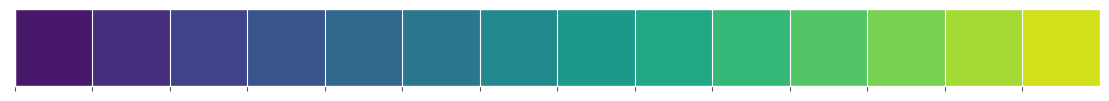

In [15]:
# Define the custom color palette
custom_palette = sns.color_palette("viridis", 14)
sns.palplot(custom_palette)

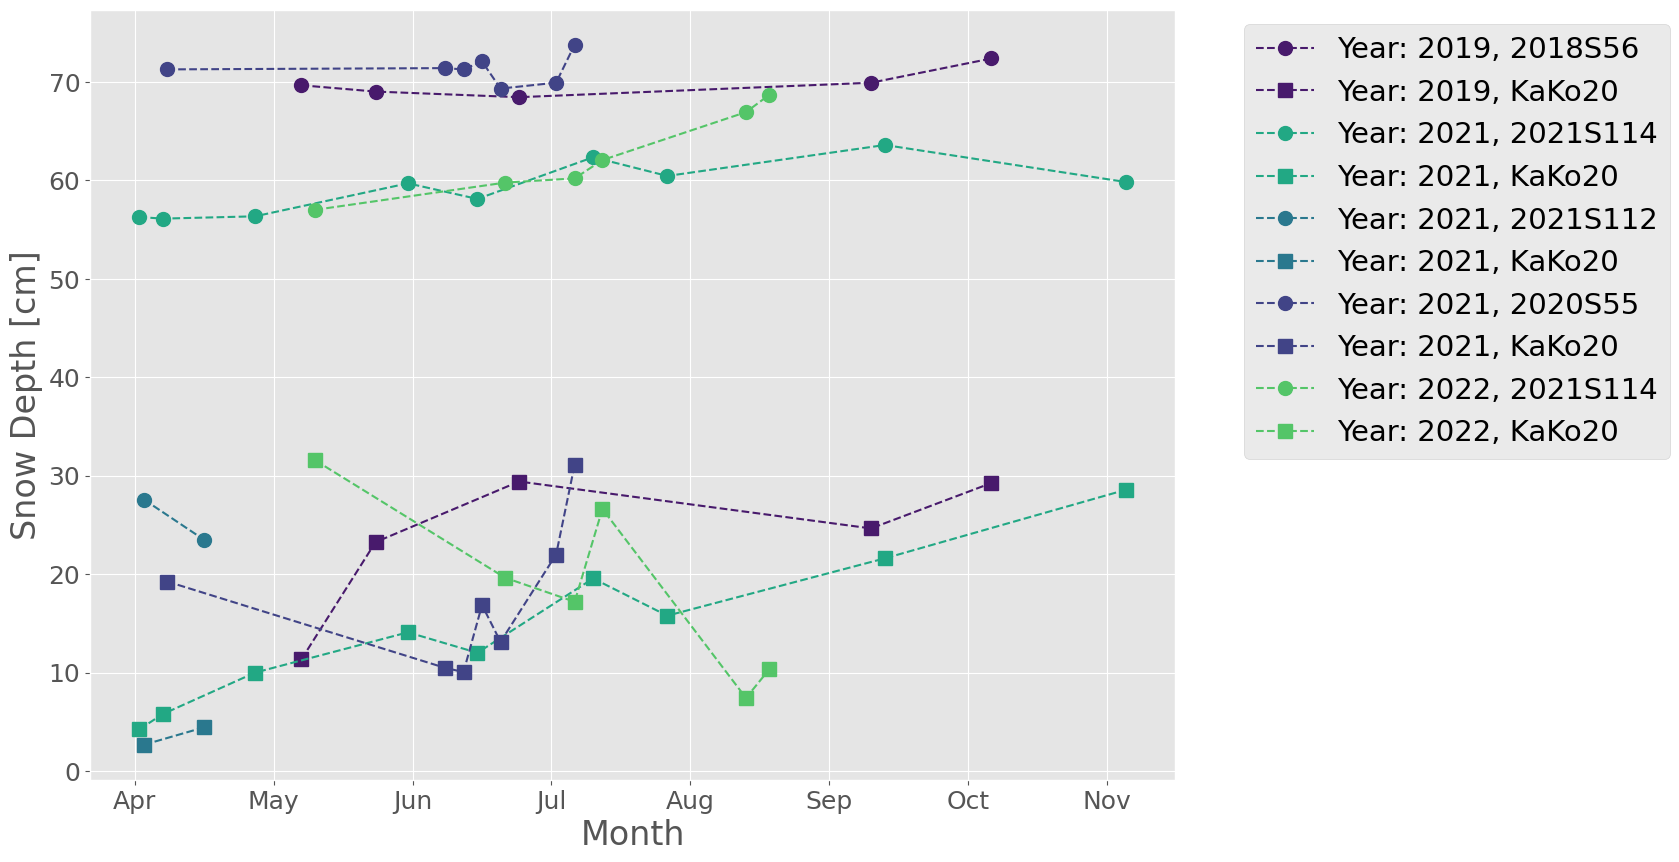

In [16]:
# Define the mapping for old sensor numbers to new format
sensor_number_mapping = {
    "S119": "2022S119",
    "S56": "2018S56",
    "S55": "2020S55",
    "S114": "2021S114",
    "S112": "2021S112"
}

# Update the Sensor_Number column in matches_all DataFrame
matches_all["Sensor_Number"] = matches_all["Sensor_Number"].map(sensor_number_mapping).fillna(matches_all["Sensor_Number"])

# Create a mapping from sensor number to specific colors from the custom palette
sensor_color_map = {
    "2022S119": custom_palette[13],
    "2018S56": custom_palette[0],
    "2020S55": custom_palette[2],
    "2021S114": custom_palette[8],
    "2021S112": custom_palette[5]
}

# Update the specific condition for "2021S114" in year 2022
special_condition_color = custom_palette[10]

# Create a new column "Month_Day" that combines month and day into a fractional month representation
matches_all["Month_Day"] = matches_all["Month"] + matches_all["Day"] / 30.0

# Create a new column combining "Sensor_Number" and "Year" for unique color assignment
matches_all["Sensor_Year"] = matches_all["Sensor_Number"].astype(str) + "_" + matches_all["Year"].astype(str)

# Create the plot
plt.figure(figsize=(14, 10))  

# Loop through each sensor-year combination and plot the data
sensor_years = matches_all["Sensor_Year"].unique()
for sensor_year in sensor_years:
    sensor_year_data = matches_all[matches_all["Sensor_Year"] == sensor_year]
    
    # Extract the year from the "Sensor_Year" column
    year = sensor_year.split("_")[1]
    sensor = sensor_year.split("_")[0]
    
    # Determine the color based on the sensor number and special condition
    if sensor == "2021S114" and year == "2022":
        color = special_condition_color
    else:
        color = sensor_color_map.get(sensor, "black")  
    
    # Plot buoy data with circles
    plt.plot(sensor_year_data["Month_Day"], sensor_year_data["Snow_depth_buoy"], marker="o", linestyle="--", 
             markersize=10, label=f"Year: {year}, {sensor}", color=color)
    
    # Plot satellite data with squares
    plt.plot(sensor_year_data["Month_Day"], sensor_year_data["Snow_depth_satellite"], marker="s", linestyle="--", 
             markersize=10, label=f"Year: {year}, KaKo20", color=color)

# Set x-axis labels to be the month names with approximate positions
plt.xticks(ticks=[4 + i for i in range(8)], labels=["Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov"])

plt.tick_params(axis="x", labelsize=18)
plt.tick_params(axis="y", labelsize=18)

# Add labels and title
plt.xlabel("Month", fontsize=24)
plt.ylabel("Snow Depth [cm]", fontsize=24)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=21)
plt.grid(True)

plt.savefig("SnowDepthComparism_grey.png", bbox_inches="tight")

# Show the plot
plt.show()


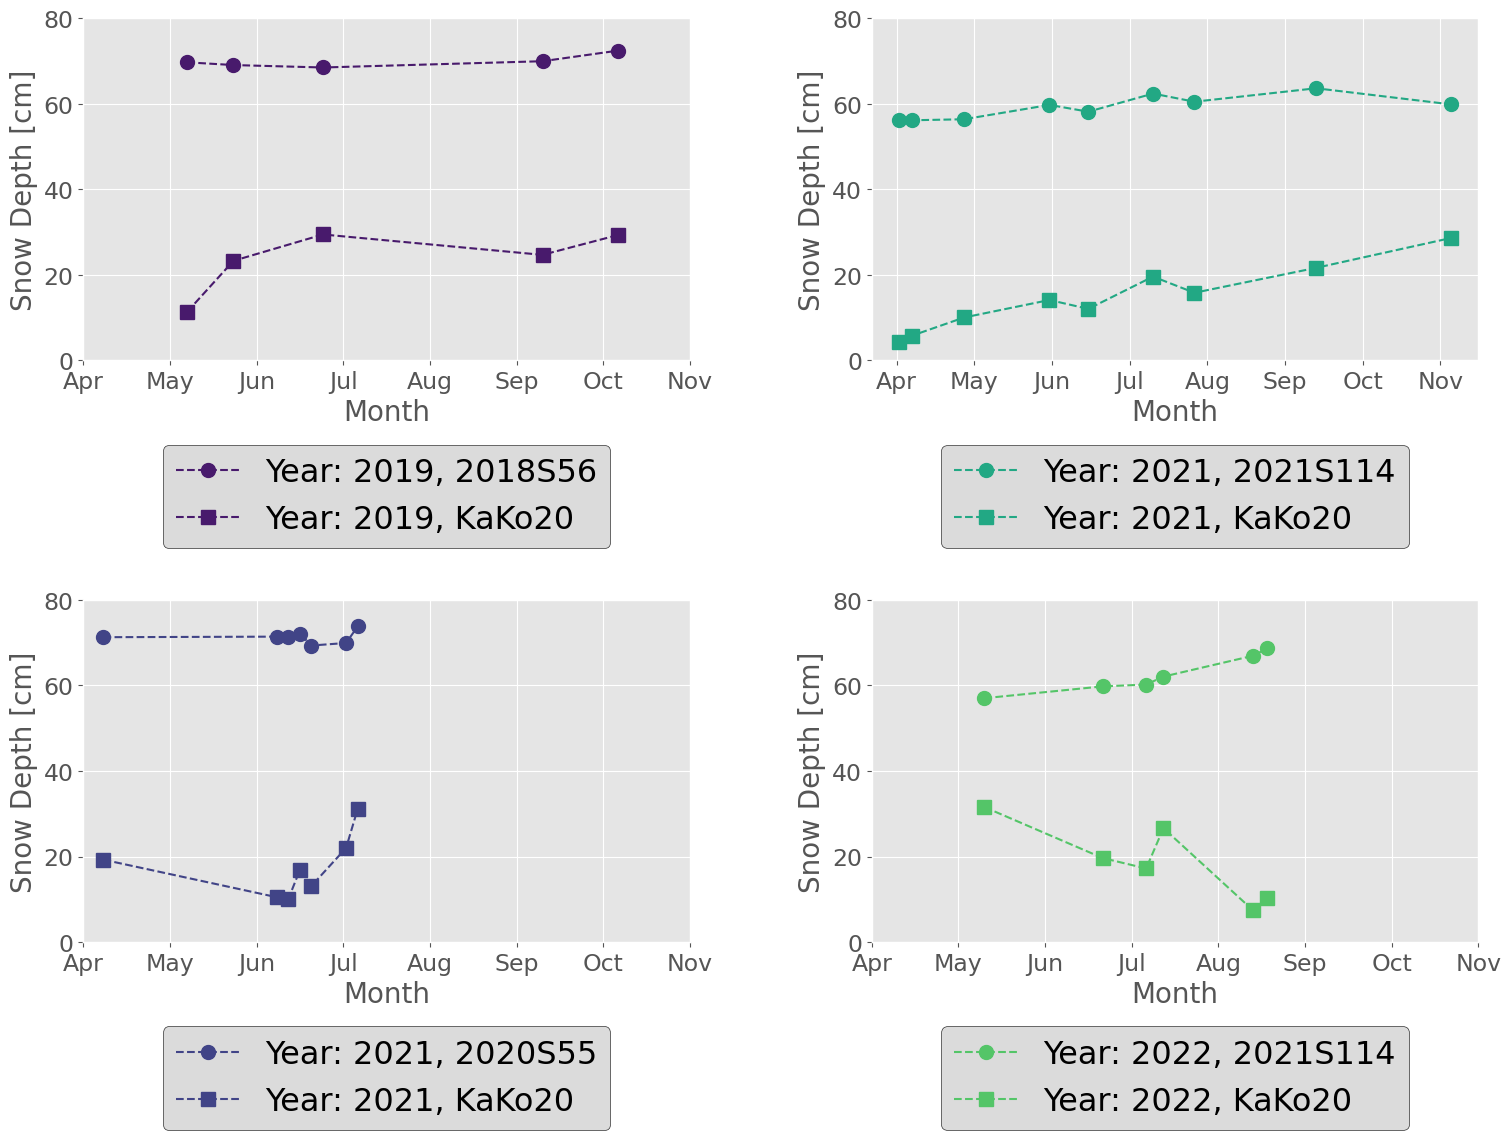

In [17]:
# Set the y-axis limits
y_limits = (0, 80)

# Set up the figure with a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12), gridspec_kw={"hspace": 0.7, "wspace": 0.3}) 

# Flatten the axes array to easily iterate over it
axes = axes.flatten()

# Define the 4 sensor-year combinations you want to plot
sensor_years_to_plot = ["2018S56_2019", "2021S114_2021", "2020S55_2021", "2021S114_2022"]

# Loop through each subplot and plot a different sensor-year combination
for i, ax in enumerate(axes[:4]):  
    sensor_year = sensor_years_to_plot[i]
    sensor_year_data = matches_all[matches_all["Sensor_Year"] == sensor_year]
    
    # Check if the filtered data is not empty
    if sensor_year_data.empty:
        ax.text(0.5, 0.5, f"No data for {sensor_year}", ha="center", va="center", fontsize=14, color="red")
        ax.set_xticks([])
        ax.set_yticks([])
        continue  # Skip plotting if no data is available

    # Extract the year and sensor information
    year = sensor_year.split("_")[1]
    sensor = sensor_year.split("_")[0]
    
    # Determine the color based on the sensor number and special condition
    if sensor == "2021S114" and year == "2022":
        color = special_condition_color
    else:
        color = sensor_color_map.get(sensor, "black")  

    # Plot buoy data with circles
    ax.plot(sensor_year_data["Month_Day"], sensor_year_data["Snow_depth_buoy"], marker="o", linestyle="--",  markersize=10,
             label=f"Year: {year}, {sensor}", color=color)
    
    # Plot satellite data with squares
    ax.plot(sensor_year_data["Month_Day"], sensor_year_data["Snow_depth_satellite"], marker="s", linestyle="--",  
            markersize=10, label=f"Year: {year}, KaKo20", color=color)
    
    # Set x-axis labels to be the month names with approximate positions
    ax.set_xticks([4 + i for i in range(8)])
    ax.set_xticklabels(["Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov"])
    ax.set_ylim(y_limits)
    
    # Customize the axis labels and ticks
    ax.tick_params(axis="x", labelsize=17)
    ax.tick_params(axis="y", labelsize=17)
    ax.grid(True)
    ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.2), fontsize=23, ncol=1, frameon=True, facecolor="lightgrey", edgecolor="black")
    ax.set_xlabel("Month", fontsize=20)
    ax.set_ylabel("Snow Depth [cm]", fontsize=20)


plt.savefig("SnowDepthComparism_subplots.png", bbox_inches="tight")
plt.show()


In [18]:
matches_all["Difference"] = matches_all["Snow_depth_buoy"] - matches_all["Snow_depth_satellite"]
Differences = matches_all["Difference"]
SampleMean_Differences = np.nanmean(Differences)
SampleMedian_Differences = np.nanmedian(Differences)

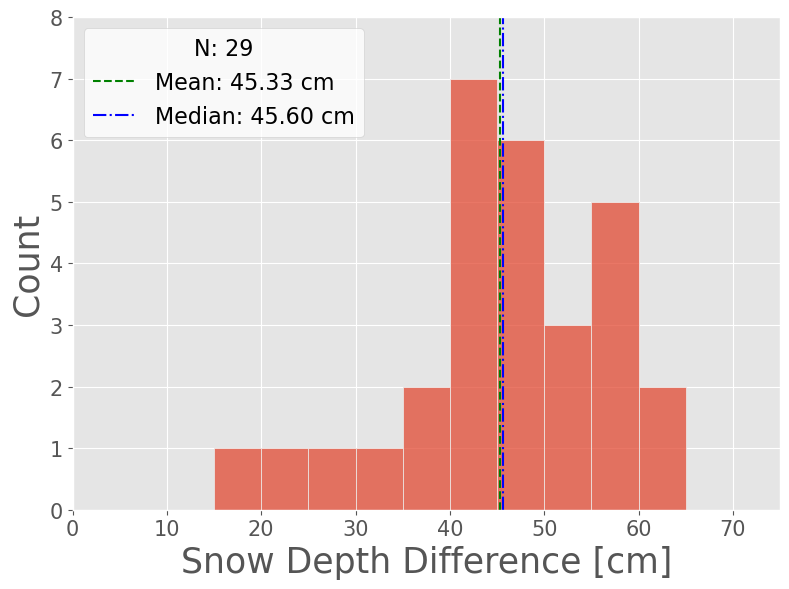

In [19]:
fig, axs = plt.subplots(figsize=(8, 6))

# Define font size
title_fontsize = 14
label_fontsize = 25
linespacing = 1.5

# Set the axis limits
x_limits = (0, 75)
y_limits = (0, 8)

# Define a common bin width and calculate the number of bins
bin_width = 5
bins = np.arange(x_limits[0], x_limits[1] + bin_width, bin_width)

# Plot and set titles and labels with adjusted fontsize and linespacing
sns.histplot(Differences, stat="count", bins=bins, ax=axs)
axs.axvline(SampleMean_Differences, color="green", linestyle="--", label="Mean: {:.2f} cm".format(SampleMean_Differences))
axs.axvline(SampleMedian_Differences, color="blue", linestyle="-.", label="Median: {:.2f} cm".format(SampleMedian_Differences))
axs.set_xlabel("Snow Depth Difference [cm]", fontsize=label_fontsize)
axs.set_ylabel("Count", fontsize=label_fontsize)
axs.set_xlim(x_limits)
axs.set_ylim(y_limits)
axs.tick_params(axis="x", labelsize=15)
axs.tick_params(axis="y", labelsize=15)
axs.legend(title=f"N: 29", title_fontsize=16, loc="upper left", fontsize=16, facecolor="white")

# Adjust layout for better readability
plt.tight_layout()

# Save the plot
plt.savefig("Difference_Histogram_Simple.png", dpi=300, bbox_inches="tight")

# Display the plot
plt.show()


In [20]:
S56 = matches_all[matches_all["Sensor_Number"] == "2018S56"]
S114_2021 = matches_all[(matches_all["Sensor_Number"] == "2021S114") & (matches_all["Year"] == 2021)]
S112 = matches_all[matches_all["Sensor_Number"] == "2021S112"]
S55 = matches_all[matches_all["Sensor_Number"] == "2020S55"]
S114_2022 = matches_all[(matches_all["Sensor_Number"] == "2021S114") & (matches_all["Year"] == 2022)]

In [21]:
y = S56["Snow_depth_buoy"]
result = stats.describe(y, ddof=1, bias=False)
print(result)

y = S56["Snow_depth_satellite"]
result = stats.describe(y, ddof=1, bias=False)
print(result)

DescribeResult(nobs=5, minmax=(68.443, 72.372), mean=69.8782, variance=2.269464200000003, skewness=1.449770688989349, kurtosis=2.5523431883711147)
DescribeResult(nobs=5, minmax=(11.35041, 29.40812), mean=23.582016, variance=54.24682818933, skewness=-1.5104884550780118, kurtosis=2.4383639156835617)


In [22]:
y = S55["Snow_depth_buoy"]
result = stats.describe(y, ddof=1, bias=False)
print(result)

y = S55["Snow_depth_satellite"]
result = stats.describe(y, ddof=1, bias=False)
print(result)

DescribeResult(nobs=7, minmax=(69.318, 73.771), mean=71.28557142857143, variance=2.0928206190476177, skewness=0.4352455493490891, kurtosis=0.6792004264182205)
DescribeResult(nobs=7, minmax=(10.05532, 31.11419), mean=17.554212857142858, variance=55.46891000592382, skewness=0.9732498080215073, kurtosis=0.7052990692584826)


In [23]:
y = S114_2021["Snow_depth_buoy"]
result = stats.describe(y, ddof=1, bias=False)
print(result)

y = S114_2021["Snow_depth_satellite"]
result = stats.describe(y, ddof=1, bias=False)
print(result)

DescribeResult(nobs=9, minmax=(56.108, 63.586), mean=59.19166666666667, variance=7.349890749999999, skewness=0.32218348285450776, kurtosis=-1.0769933287816982)
DescribeResult(nobs=9, minmax=(4.23426, 28.56576), mean=14.625282222222223, variance=60.448857168019444, skewness=0.4236627699329768, kurtosis=-0.2437090106147055)


In [24]:
y = S112["Snow_depth_buoy"]
result = stats.describe(y, ddof=1, bias=False)
print(result)

y = S112["Snow_depth_satellite"]
result = stats.describe(y, ddof=1, bias=False)
print(result)

DescribeResult(nobs=2, minmax=(23.484, 27.575), mean=25.5295, variance=8.36814049999999, skewness=2.5944289033562182e-15, kurtosis=-2.0)
DescribeResult(nobs=2, minmax=(2.6753, 4.44346), mean=3.55938, variance=1.5631948928, skewness=0.0, kurtosis=-2.0)


In [25]:
y = S114_2022["Snow_depth_buoy"]
result = stats.describe(y, ddof=1, bias=False)
print(result)

y = S114_2022["Snow_depth_satellite"]
result = stats.describe(y, ddof=1, bias=False)
print(result)

DescribeResult(nobs=6, minmax=(57.006, 68.672), mean=62.43683333333333, variance=20.15988816666667, skewness=0.47144238582551795, kurtosis=-1.3193296621686177)
DescribeResult(nobs=6, minmax=(7.42236, 31.5519), mean=18.790029999999998, variance=85.6957326892, skewness=0.18078156438315224, kurtosis=-1.2792090100965834)


<div class="alert alert-danger" role="alert">

### <a id="section4.3"></a> Histograms
[Back to top](#TOC_TOP)

</div>

In [26]:
SampleMean_KaKo20_snow = np.nanmean(KaKo20_snow)
SampleMean_buoy_snow = np.nanmean(buoy_snow)
SampleMean_KaKo20_matches = np.nanmean(KaKo20_matches)
SampleMean_Buoy_matches = np.nanmean(Buoy_matches)

SampleMedian_KaKo20_snow = np.nanmedian(KaKo20_snow)
SampleMedian_buoy_snow = np.nanmedian(buoy_snow)
SampleMedian_KaKo20_matches = np.nanmedian(KaKo20_matches)
SampleMedian_Buoy_matches = np.nanmedian(Buoy_matches)

N_KaKo20 = len(KaKo20_snow)
N_Buoy = len(buoy_snow)

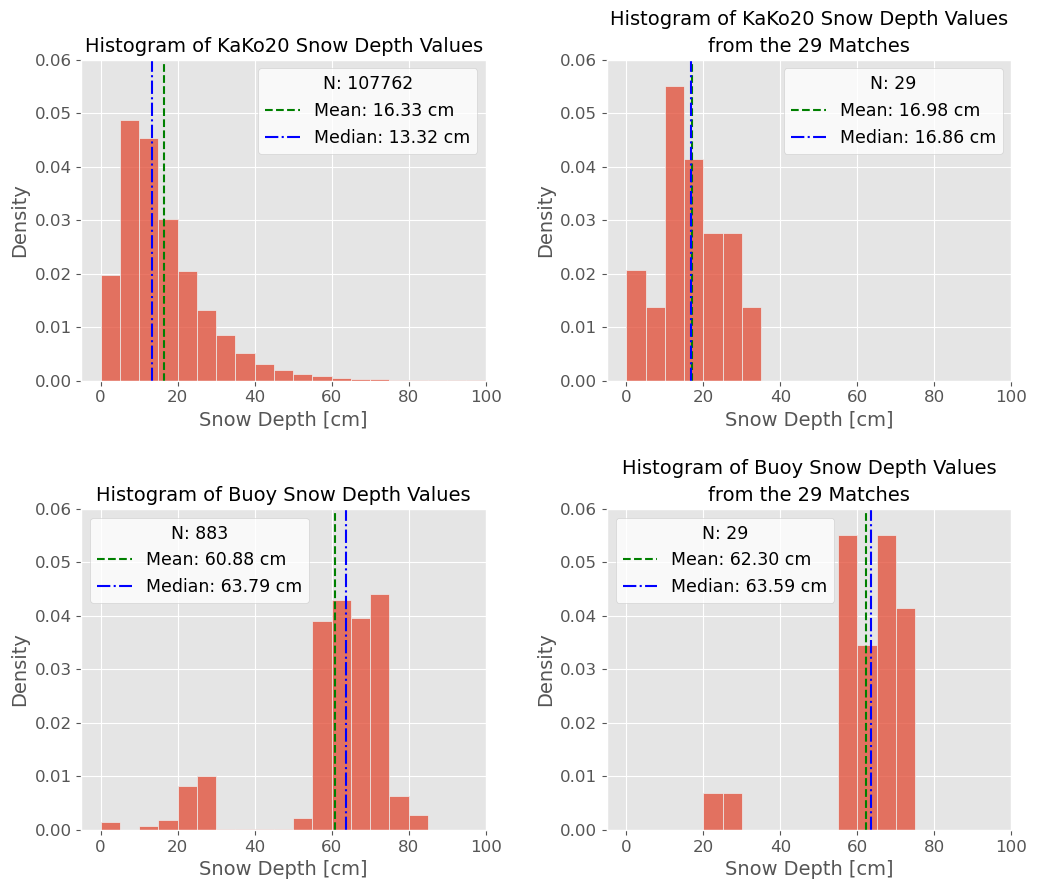

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10), gridspec_kw={"hspace": 0.4, "wspace": 0.3})

# Define font size
title_fontsize = 14
label_fontsize = 14
linespacing = 1.5

# Set the axis limits
x_limits = (-5, 100)
y_limits = (0, 0.06)

# Define a common bin width and calculate the number of bins
bin_width = 5
bins = np.arange(x_limits[0], x_limits[1] + bin_width, bin_width)

# Plot and set titles and labels with adjusted fontsize and linespacing
sns.histplot(KaKo20_snow, kde=False, stat="density", bins=bins, ax=axs[0, 0])
axs[0, 0].set_title("Histogram of KaKo20 Snow Depth Values", fontsize=title_fontsize, linespacing=linespacing)
axs[0, 0].axvline(SampleMean_KaKo20_snow, color="green", linestyle="--", label="Mean: {:.2f} cm".format(SampleMean_KaKo20_snow))
axs[0, 0].axvline(SampleMedian_KaKo20_snow, color="blue", linestyle="-.", label="Median: {:.2f} cm".format(SampleMedian_KaKo20_snow))
axs[0, 0].set_xlabel("Snow Depth [cm]", fontsize=label_fontsize)
axs[0, 0].set_ylabel("Density", fontsize=label_fontsize)
axs[0, 0].set_xlim(x_limits)
axs[0, 0].set_ylim(y_limits)
axs[0, 0].tick_params(axis="x", labelsize=12)
axs[0, 0].tick_params(axis="y", labelsize=12)
axs[0, 0].legend(title=f"N: {N_KaKo20}", title_fontsize=12.5, fontsize=12.5, facecolor="white")

sns.histplot(buoy_snow, kde=False, stat="density", bins=bins, ax=axs[1, 0])
axs[1, 0].set_title("Histogram of Buoy Snow Depth Values", fontsize=title_fontsize, linespacing=linespacing)
axs[1, 0].axvline(SampleMean_buoy_snow, color="green", linestyle="--", label="Mean: {:.2f} cm".format(SampleMean_buoy_snow))
axs[1, 0].axvline(SampleMedian_buoy_snow, color="blue", linestyle="-.", label="Median: {:.2f} cm".format(SampleMedian_buoy_snow))
axs[1, 0].set_xlabel("Snow Depth [cm]", fontsize=label_fontsize)
axs[1, 0].set_ylabel("Density", fontsize=label_fontsize)
axs[1, 0].set_xlim(x_limits)
axs[1, 0].set_ylim(y_limits)
axs[1, 0].tick_params(axis="x", labelsize=12)
axs[1, 0].tick_params(axis="y", labelsize=12)
axs[1, 0].legend(title=f"N: {N_Buoy}", title_fontsize=12.5, fontsize=12.5, facecolor="white")

sns.histplot(KaKo20_matches, kde=False, stat="density", bins=bins, ax=axs[0, 1])
axs[0, 1].set_title("Histogram of KaKo20 Snow Depth Values\nfrom the 29 Matches", fontsize=title_fontsize, linespacing=linespacing)
axs[0, 1].axvline(SampleMean_KaKo20_matches, color="green", linestyle="--", label="Mean: {:.2f} cm".format(SampleMean_KaKo20_matches))
axs[0, 1].axvline(SampleMedian_KaKo20_matches, color="blue", linestyle="-.", label="Median: {:.2f} cm".format(SampleMedian_KaKo20_matches))
axs[0, 1].set_xlabel("Snow Depth [cm]", fontsize=label_fontsize)
axs[0, 1].set_ylabel("Density", fontsize=label_fontsize)
axs[0, 1].set_xlim(x_limits)
axs[0, 1].set_ylim(y_limits)
axs[0, 1].tick_params(axis="x", labelsize=12)
axs[0, 1].tick_params(axis="y", labelsize=12)
axs[0, 1].legend(title=f"N: 29", title_fontsize=12.5, fontsize=12.5, facecolor="white")


sns.histplot(Buoy_matches, kde=False, stat="density", bins=bins, ax=axs[1, 1])
axs[1, 1].set_title("Histogram of Buoy Snow Depth Values\nfrom the 29 Matches", fontsize=title_fontsize, linespacing=linespacing)
axs[1, 1].axvline(SampleMean_Buoy_matches, color="green", linestyle="--", label="Mean: {:.2f} cm".format(SampleMean_Buoy_matches))
axs[1, 1].axvline(SampleMedian_Buoy_matches, color="blue", linestyle="-.", label="Median: {:.2f} cm".format(SampleMedian_Buoy_matches))
axs[1, 1].set_xlabel("Snow Depth [cm]", fontsize=label_fontsize)
axs[1, 1].set_ylabel("Density", fontsize=label_fontsize)
axs[1, 1].set_xlim(x_limits)
axs[1, 1].set_ylim(y_limits)
axs[1, 1].tick_params(axis="x", labelsize=12)
axs[1, 1].tick_params(axis="y", labelsize=12)
axs[1, 1].legend(title=f"N: 29", title_fontsize=12.5, fontsize=12.5, facecolor="white")

# Save the plot
plt.savefig("snow_depth_histograms_same_axis_bin5cm.png", dpi=300, bbox_inches="tight")

# Display the plot
plt.show()


<div class="alert alert-danger" role="alert">

### <a id="section4.4"></a> Q-Q Plots and Shapiro-Wilk Test
[Back to top](#TOC_TOP)

</div>

In [28]:
#remove outliers: 
matches_all_cleaned = matches_all[matches_all["Snow_depth_buoy"] > 30]
Buoy_matches_cleaned = matches_all_cleaned["Snow_depth_buoy"]

In [29]:
KaKo20_matches_cleaned = matches_all_cleaned["Snow_depth_satellite"]

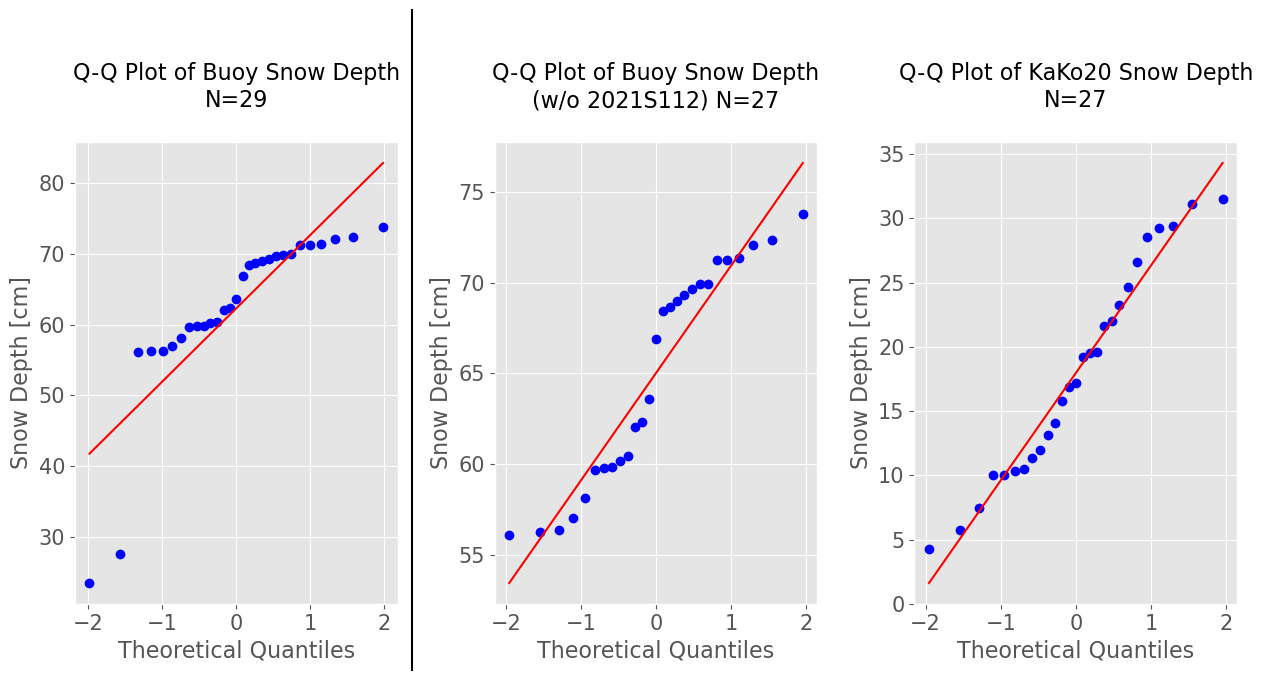

In [30]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6), gridspec_kw={"hspace": 0.1, "wspace": 0.3})

# Plot QQ plot on the first axis
stats.probplot(Buoy_matches, dist="norm", plot=axs[0])
axs[0].set_title("Q-Q Plot of Buoy Snow Depth\nN=29\n", fontsize=16)
axs[0].set_xlabel("Theoretical Quantiles", fontsize=16)
axs[0].set_ylabel("Snow Depth [cm]", fontsize=16)
axs[0].tick_params(axis="x", labelsize=15)
axs[0].tick_params(axis="y", labelsize=15)

# Plot QQ plot on the second axis
stats.probplot(Buoy_matches_cleaned, dist="norm", plot=axs[1])
axs[1].set_title("Q-Q Plot of Buoy Snow Depth\n(w/o 2021S112) N=27\n", fontsize=16)
axs[1].set_xlabel("Theoretical Quantiles", fontsize=16)
axs[1].set_ylabel("Snow Depth [cm]", fontsize=16)
axs[1].tick_params(axis="x", labelsize=15)
axs[1].tick_params(axis="y", labelsize=15)

# Plot QQ plot on the third axis
stats.probplot(KaKo20_matches_cleaned, dist="norm", plot=axs[2])
axs[2].set_title("Q-Q Plot of KaKo20 Snow Depth\nN=27\n", fontsize=16)
axs[2].set_xlabel("Theoretical Quantiles", fontsize=16)
axs[2].set_ylabel("Snow Depth [cm]", fontsize=16)
axs[2].tick_params(axis="x", labelsize=15)
axs[2].tick_params(axis="y", labelsize=15)

# Add a vertical line between the first and second plot using figure coordinates
line_x = 0.35  
fig.add_artist(plt.Line2D((line_x, line_x), (0.0, 1.1), color="black", linestyle="-", linewidth=1.5))

plt.savefig("QQ_plot_without_outliers02.png", dpi=300, bbox_inches="tight")
plt.show()


In [31]:
#Shapiro-Wilk test
#.. perform Shapiro-Wilk test and print probability value
TestStat,ProbVal = shapiro(Buoy_matches_cleaned) #27 matches Snow Buoys
print("* Shapiro-Wilk test, probability value   : {:.2e}\n".format(ProbVal))

* Shapiro-Wilk test, probability value   : 9.21e-03



In [32]:
TestStat,ProbVal = shapiro(KaKo20_matches_cleaned) #27 matches Kako20
print("* Shapiro-Wilk test, probability value   : {:.2e}\n".format(ProbVal))

* Shapiro-Wilk test, probability value   : 2.82e-01



<div class="alert alert-danger" role="alert">

### <a id="section4.5"></a> Pearson and Spearman Correlation Test
[Back to top](#TOC_TOP)

</div>

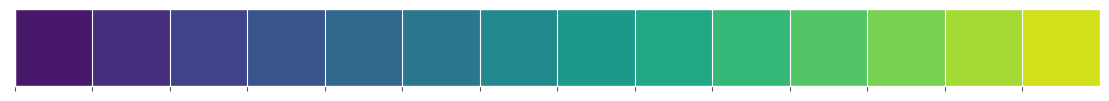

In [33]:
# Define the custom color palette
custom_palette = sns.color_palette("viridis", 14)
sns.palplot(custom_palette)

In [34]:
slope, intercept, r, *__ = stats.linregress(Buoy_matches, KaKo20_matches)
line = f"Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}"

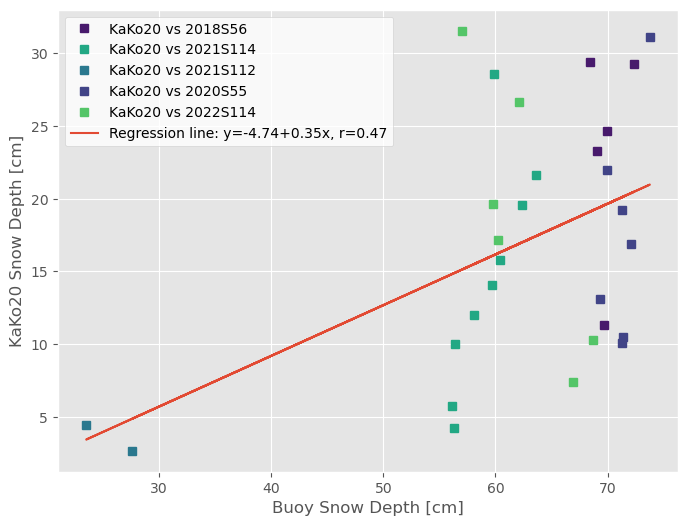

In [35]:
fig, ax = plt.subplots(figsize=(8, 6))  
ax.plot(S56["Snow_depth_buoy"], S56["Snow_depth_satellite"], linewidth=0, marker="s", c= custom_palette[0], label="KaKo20 vs 2018S56")
ax.plot(S114_2021["Snow_depth_buoy"], S114_2021["Snow_depth_satellite"], linewidth=0, marker="s", c= custom_palette[8], label="KaKo20 vs 2021S114")
ax.plot(S112["Snow_depth_buoy"], S112["Snow_depth_satellite"], linewidth=0, marker="s", c= custom_palette[5], label="KaKo20 vs 2021S112")
ax.plot(S55["Snow_depth_buoy"], S55["Snow_depth_satellite"], linewidth=0, marker="s", c= custom_palette[2], label="KaKo20 vs 2020S55")
ax.plot(S114_2022["Snow_depth_buoy"], S114_2022["Snow_depth_satellite"], linewidth=0, marker="s", c= custom_palette[10], label="KaKo20 vs 2022S114")
ax.plot(Buoy_matches, intercept + slope * Buoy_matches, label=line)

# Set font size for labels 
ax.set_xlabel("Buoy Snow Depth [cm]", fontsize=12)
ax.set_ylabel("KaKo20 Snow Depth [cm]", fontsize=12)
ax.legend(facecolor="white", fontsize=10)

plt.show()

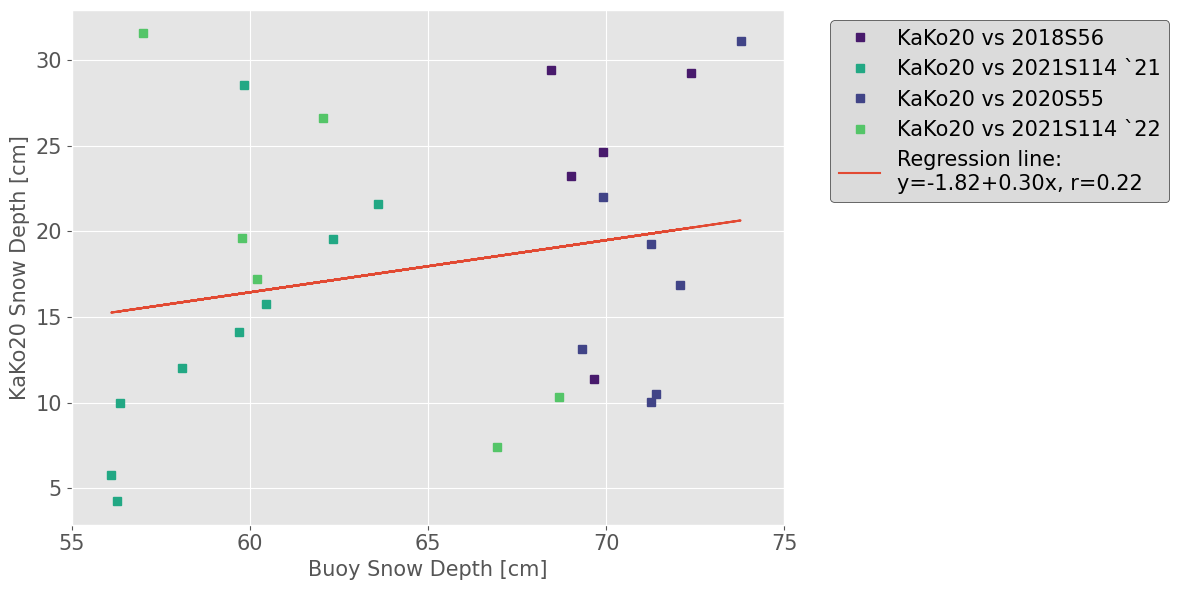

In [36]:
x_clean = matches_all_cleaned["Snow_depth_buoy"]
y_clean = matches_all_cleaned["Snow_depth_satellite"]
slope_clean, intercept_clean, r_clean, *__ = stats.linregress(x_clean, y_clean)
line = f"Regression line:\ny={intercept_clean:.2f}+{slope_clean:.2f}x, r={r_clean:.2f}"

fig, ax = plt.subplots(figsize=(12, 6))  
ax.plot(S56["Snow_depth_buoy"], S56["Snow_depth_satellite"], linewidth=0, marker="s", c= custom_palette[0], label="KaKo20 vs 2018S56")
ax.plot(S114_2021["Snow_depth_buoy"], S114_2021["Snow_depth_satellite"], linewidth=0, marker="s", c= custom_palette[8], label="KaKo20 vs 2021S114 `21")
ax.plot(S55["Snow_depth_buoy"], S55["Snow_depth_satellite"], linewidth=0, marker="s", c= custom_palette[2], label="KaKo20 vs 2020S55")
ax.plot(S114_2022["Snow_depth_buoy"], S114_2022["Snow_depth_satellite"], linewidth=0, marker="s", c= custom_palette[10], label="KaKo20 vs 2021S114 `22")
ax.plot(x_clean, intercept_clean + slope_clean * x_clean, label=line)

# Set font size for labels
ax.set_xlabel("Buoy Snow Depth [cm]", fontsize=15)
ax.set_ylabel("KaKo20 Snow Depth [cm]", fontsize=15)
plt.xticks([55, 60, 65, 70, 75])
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)

ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=15, frameon=True, facecolor="lightgrey", edgecolor="black")

plt.tight_layout()
plt.savefig("Scatter_wo.png", dpi=300)  
plt.show()

In [37]:
# calculate Pearson's correlation coefficient and p-value
r, p = stats.pearsonr(matches_all_cleaned["Snow_depth_buoy"], matches_all_cleaned["Snow_depth_satellite"])
print("Pearson's correlation coefficient:", r)
print("p-value:", p)

Pearson's correlation coefficient: 0.22225503108168218
p-value: 0.2651797847664734


In [38]:
# calculate Spearman's correlation coefficient and p-value
corr, pval = spearmanr(matches_all_cleaned["Snow_depth_buoy"], matches_all_cleaned["Snow_depth_satellite"])
 
print("Spearman's correlation coefficient:", corr)
print("p-value:", pval)

Spearman's correlation coefficient: 0.2673992673992674
p-value: 0.17752771429390315


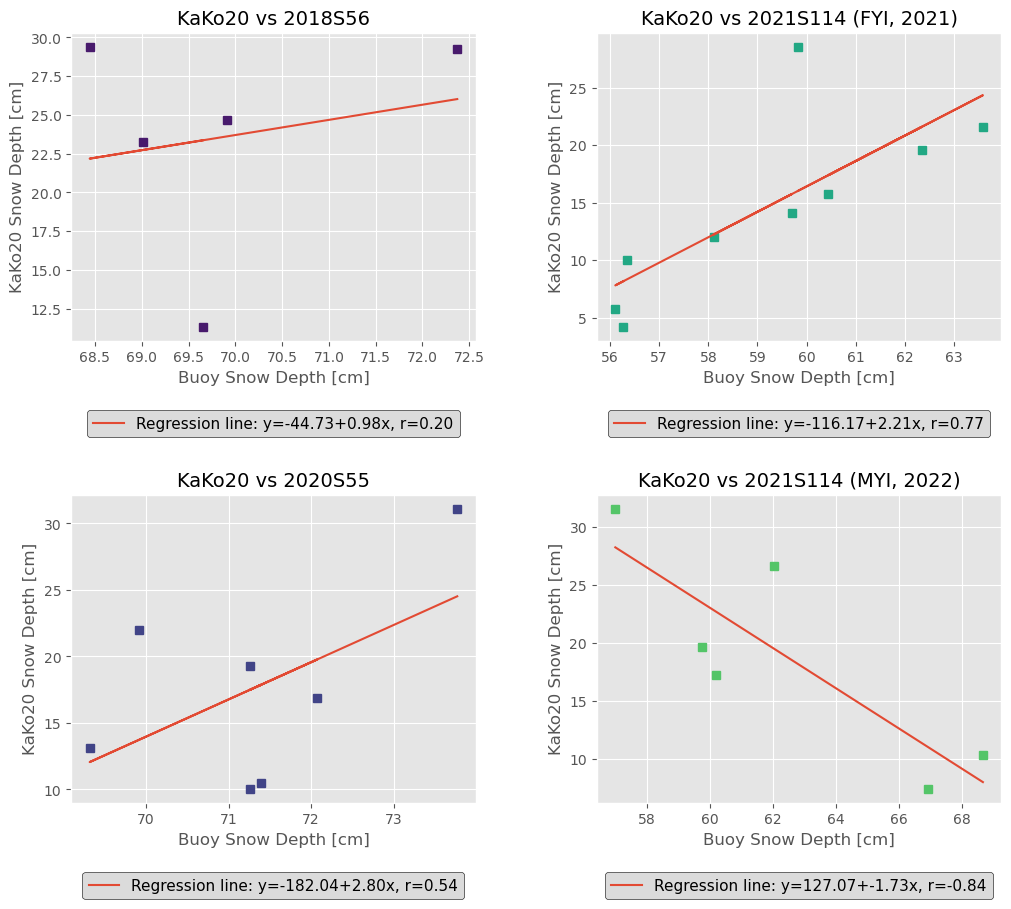

In [39]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10), gridspec_kw={"hspace": 0.5, "wspace": 0.3})  # 2x2 grid of subplots

# Plot for S56
axs[0, 0].plot(S56["Snow_depth_buoy"], S56["Snow_depth_satellite"], linewidth=0, marker="s", c=custom_palette[0])

y = S56["Snow_depth_satellite"]
x = S56["Snow_depth_buoy"]
slope, intercept, r, *__ = stats.linregress(x, y)
line = f"Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}"
axs[0, 0].plot(x, intercept + slope * x, label=line)

axs[0, 0].set_title("KaKo20 vs 2018S56", fontsize=14)
axs[0, 0].set_xlabel("Buoy Snow Depth [cm]", fontsize=12)
axs[0, 0].set_ylabel("KaKo20 Snow Depth [cm]", fontsize=12)
axs[0, 0].legend(loc="upper center", bbox_to_anchor=(0.5, -0.2), fontsize=11, ncol=1, frameon=True, facecolor="lightgrey", edgecolor="black")

# Plot for S114_2021
axs[0, 1].plot(S114_2021["Snow_depth_buoy"], S114_2021["Snow_depth_satellite"], linewidth=0, marker="s", c=custom_palette[8])

y = S114_2021["Snow_depth_satellite"]
x = S114_2021["Snow_depth_buoy"]
slope, intercept, r, *__ = stats.linregress(x, y)
line = f"Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}"
axs[0, 1].plot(x, intercept + slope * x, label=line)

axs[0, 1].set_title("KaKo20 vs 2021S114 (FYI, 2021)", fontsize=14)
axs[0, 1].set_xlabel("Buoy Snow Depth [cm]", fontsize=12)
axs[0, 1].set_ylabel("KaKo20 Snow Depth [cm]", fontsize=12)
axs[0, 1].legend(loc="upper center", bbox_to_anchor=(0.5, -0.2), fontsize=11, ncol=1, frameon=True, facecolor="lightgrey", edgecolor="black")

# Plot for S55
axs[1, 0].plot(S55["Snow_depth_buoy"], S55["Snow_depth_satellite"], linewidth=0, marker="s", c=custom_palette[2])

y = S55["Snow_depth_satellite"]
x = S55["Snow_depth_buoy"]
slope, intercept, r, *__ = stats.linregress(x, y)
line = f"Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}"
axs[1, 0].plot(x, intercept + slope * x, label=line)

axs[1, 0].set_title("KaKo20 vs 2020S55", fontsize=14)
axs[1, 0].set_xlabel("Buoy Snow Depth [cm]", fontsize=12)
axs[1, 0].set_ylabel("KaKo20 Snow Depth [cm]", fontsize=12)
axs[1, 0].legend(loc="upper center", bbox_to_anchor=(0.5, -0.2), fontsize=11, ncol=1, frameon=True, facecolor="lightgrey", edgecolor="black")

# Plot for S114_2022
axs[1, 1].plot(S114_2022["Snow_depth_buoy"], S114_2022["Snow_depth_satellite"], linewidth=0, marker="s", c=custom_palette[10])

y = S114_2022["Snow_depth_satellite"]
x = S114_2022["Snow_depth_buoy"]
slope, intercept, r, *__ = stats.linregress(x, y)
line = f"Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}"
axs[1, 1].plot(x, intercept + slope * x, label=line)

axs[1, 1].set_title("KaKo20 vs 2021S114 (MYI, 2022)", fontsize=14)
axs[1, 1].set_xlabel("Buoy Snow Depth [cm]", fontsize=12)
axs[1, 1].set_ylabel("KaKo20 Snow Depth [cm]", fontsize=12)
axs[1, 1].legend(loc="upper center", bbox_to_anchor=(0.5, -0.2), fontsize=11, ncol=1, frameon=True, facecolor="lightgrey", edgecolor="black")

plt.savefig("Scatter_per_Buoy02.png", dpi=300, bbox_inches="tight")  
plt.show()

In [40]:
r, p = stats.pearsonr(S56["Snow_depth_buoy"], S56["Snow_depth_satellite"])
print(r)
print(p)

0.19995539322693398
0.7471157259764477


In [41]:
r, p = stats.pearsonr(S114_2021["Snow_depth_buoy"], S114_2021["Snow_depth_satellite"])
print(r)
print(p)

0.770524176962151
0.015101944516222566


In [42]:
r, p = stats.pearsonr(S55["Snow_depth_buoy"], S55["Snow_depth_satellite"])
print(r)
print(p)

0.5438490348153876
0.2069794017857774


In [43]:
r, p = stats.pearsonr(S114_2022["Snow_depth_buoy"], S114_2022["Snow_depth_satellite"])
print(r)
print(p)

-0.8411231655029846
0.0358576003132604
